In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\projects\mentalhealthpredictor\mental-health-predictor\survey.csv")
print("Shape of dataset:", df.shape)
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\trive\AppData\Local\Temp\ipykernel_21540\4143666592.py:4: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\projects\mentalhealthpredictor\mental-health-predictor\survey.csv")


Shape of dataset: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df['treatment'].value_counts()


treatment
Yes    637
No     622
Name: count, dtype: int64

In [4]:
# Check types and nulls
df.info()

# Null values count
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

In [5]:
def clean_gender(g):
    g = str(g).lower()
    if 'm' in g and 'f' not in g:
        return 'Male'
    elif 'f' in g and 'm' not in g:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
df['Gender'].value_counts()


Gender
Male      999
Other     206
Female     54
Name: count, dtype: int64

In [6]:
df.drop(columns=['comments', 'state', 'Timestamp'], inplace=True, errors='ignore')


In [7]:
df.isnull().sum().sort_values(ascending=False)


work_interfere               264
self_employed                 18
Gender                         0
Age                            0
Country                        0
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [8]:
df['work_interfere'] = df['work_interfere'].fillna("Don’t know")


In [9]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['Gender', 'Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Apply LabelEncoder where it's binary (Yes/No, Male/Female, etc.)
binary_cols = ['Gender', 'self_employed', 'family_history', 'treatment']
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode multi-class categorical features
df_encoded = pd.get_dummies(df_encoded, columns=[col for col in cat_cols if col not in binary_cols])

df_encoded.head()


,Age,Gender,self_employed,family_history,treatment,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,2,2,0,1,False,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
1,44,1,2,0,0,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,32,1,2,0,0,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
3,31,1,2,1,1,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,31,1,2,0,0,False,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False


In [11]:
X = df_encoded.drop('treatment', axis=1)
y = df_encoded['treatment']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 94  30]
 [ 19 109]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       124
           1       0.78      0.85      0.82       128

    accuracy                           0.81       252
   macro avg       0.81      0.80      0.80       252
weighted avg       0.81      0.81      0.81       252



In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 95  29]
 [ 20 108]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.79       124
           1       0.79      0.84      0.82       128

    accuracy                           0.81       252
   macro avg       0.81      0.80      0.81       252
weighted avg       0.81      0.81      0.81       252



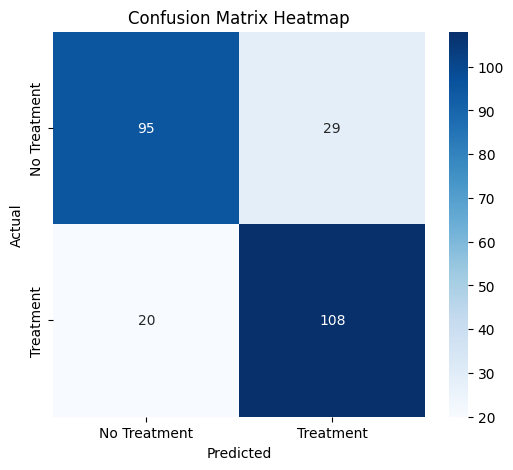

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test set using the best model
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


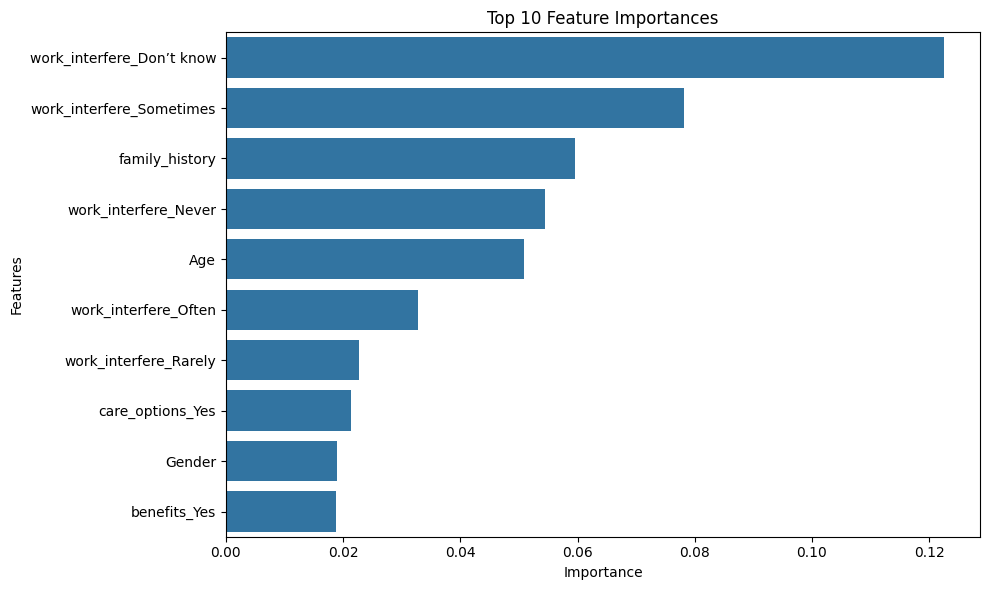

In [18]:
import numpy as np
top_n = 10
plt.figure(figsize=(10, 6))
# Get feature importances from the trained model
importances = model.feature_importances_
features = X.columns

# Get indices of top features
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [19]:
import joblib

# Save the model
joblib.dump(model, 'mental_health_model.pkl')


['mental_health_model.pkl']

In [20]:
joblib.dump(encoder, 'encoder.pkl')  


NameError: name 'encoder' is not defined